# LOST AND FOUND IN VIT

This project provides an analysis and predictive modeling for determining whether a lost item will be found.

In [ ]:
import pandas as pd
data = pd.read_csv('lost_found.csv')

In [ ]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv('lost_found.csv')
target = 'Found'

y = data[target]
X = data.drop(target, axis=1)

categorical_columns =["Item Name", "Brand", "Color", "Location Found", "Date Found", "Lost Date", "Item Category",
           "Reported Lost Duration", "Owner Information", "Finder Information", "Item Value",
           "Condition When Found", "Security Camera Coverage", "Location Traffic", "Weather Conditions",
           "Event Occurrence"]

encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(X[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, index=X.index, columns=encoder.get_feature_names_out())

X_final = pd.concat([X.drop(categorical_columns, axis=1), encoded_df], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



# Plot 1: Item Category vs Found status

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Personal Accessories'),
  Text(4, 0, 'Sporting Goods')])

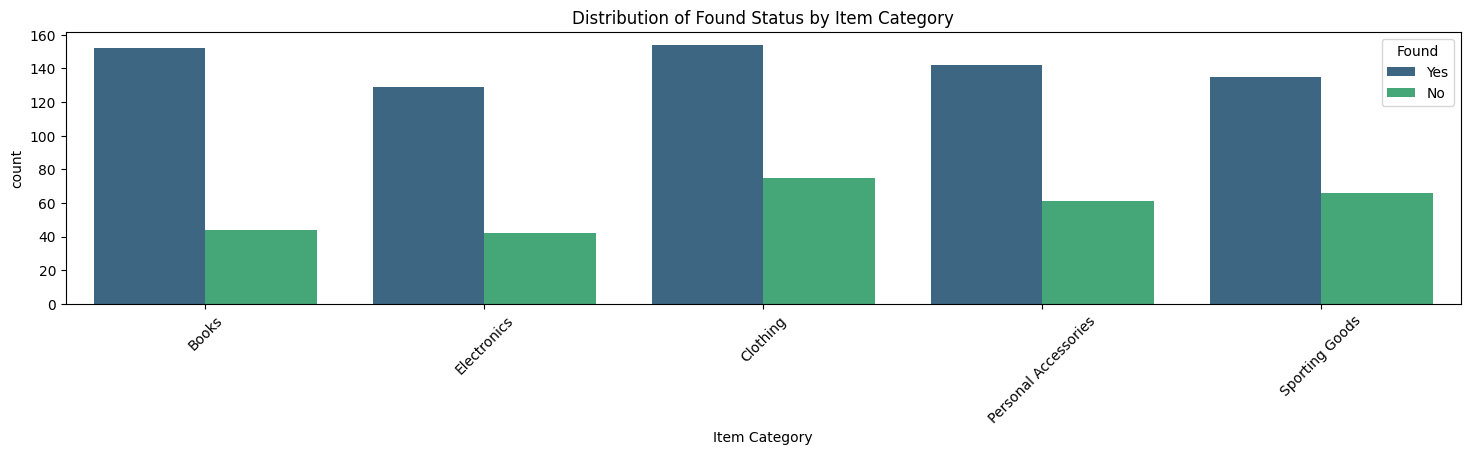

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.countplot(x='Item Category', hue='Found', data=data, palette='viridis')
plt.title('Distribution of Found Status by Item Category')
plt.xticks(rotation=45)

# Comprehensive Plotting

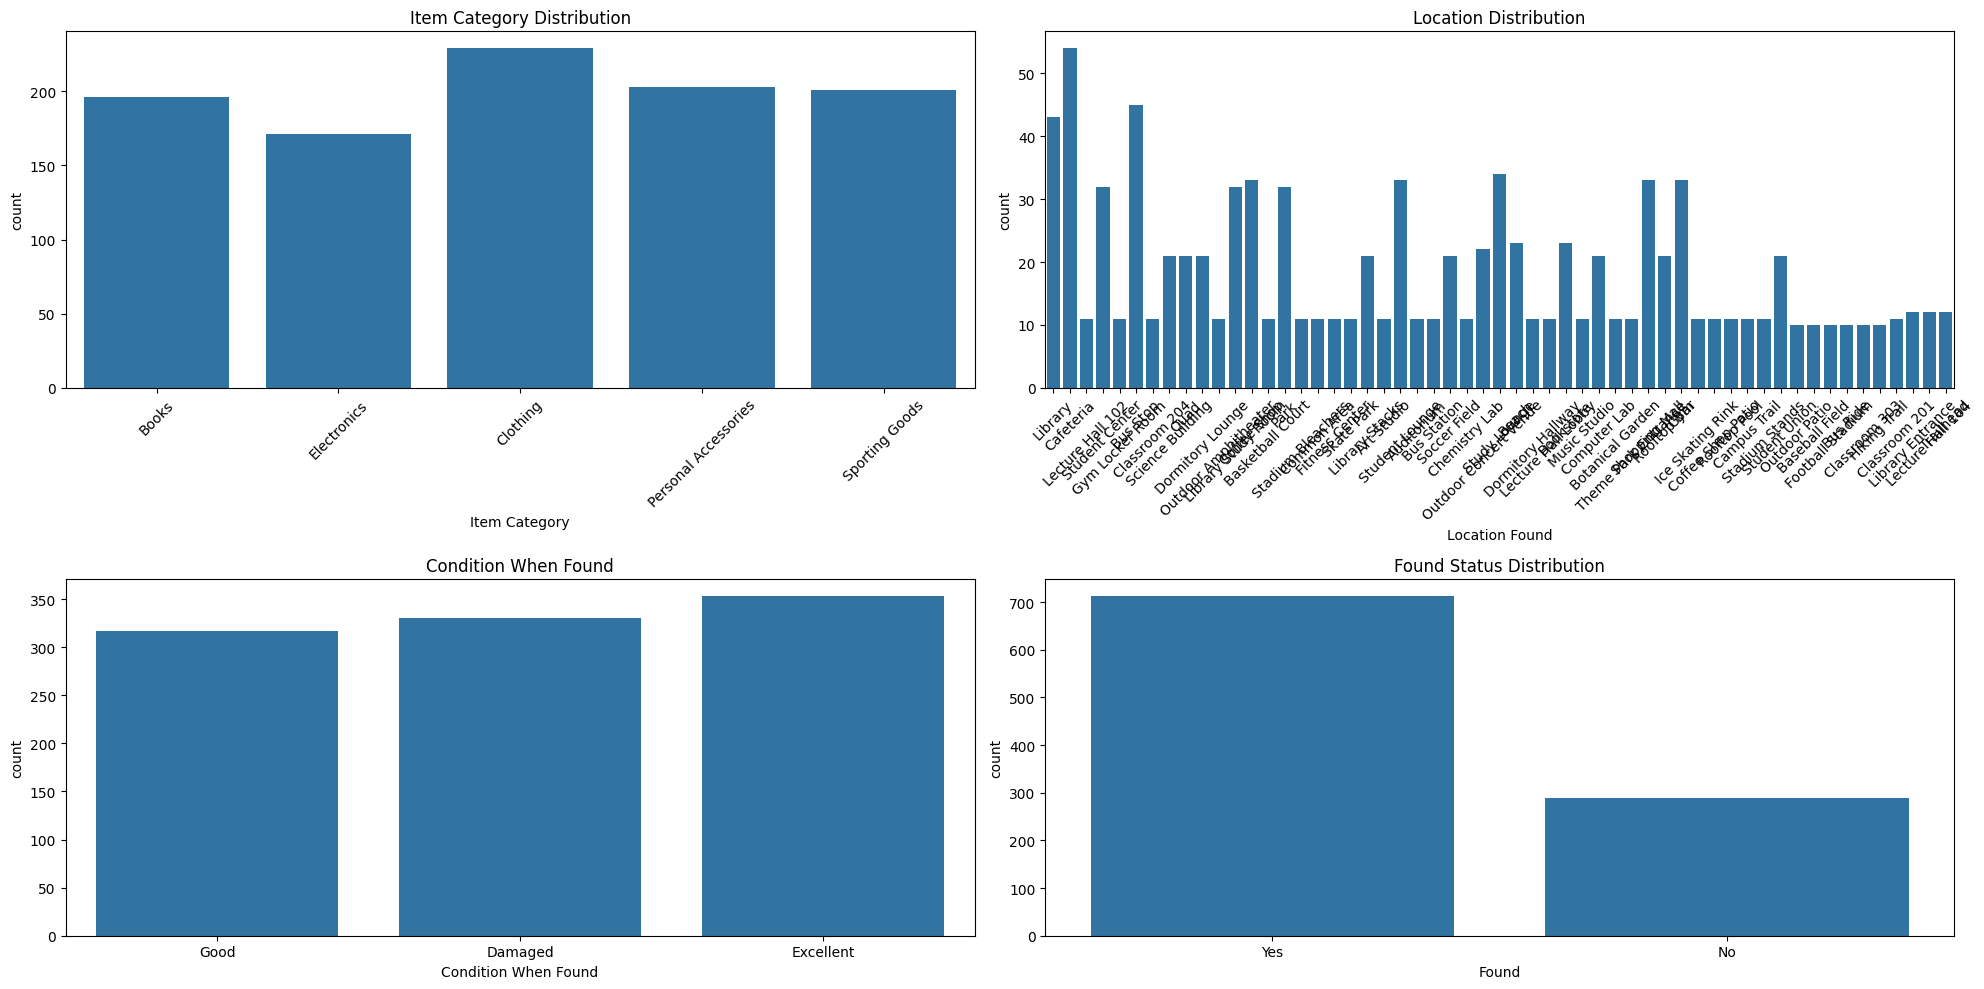

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(221)
sns.countplot(x='Item Category', data=data)
plt.title('Item Category Distribution')
plt.xticks(rotation=45)

plt.subplot(222)
sns.countplot(x='Location Found', data=data)
plt.title('Location Distribution')
plt.xticks(rotation=45)

plt.subplot(223)
sns.countplot(x='Condition When Found', data=data)
plt.title('Condition When Found')

plt.subplot(224)
sns.countplot(x='Found', data=data)
plt.title('Found Status Distribution')

plt.tight_layout()
plt.show()


# Plot 2: Location Found vs Found status

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'Library'),
  Text(1, 0, 'Cafeteria'),
  Text(2, 0, 'Lecture Hall 102'),
  Text(3, 0, 'Student Center'),
  Text(4, 0, 'Gym Locker Room'),
  Text(5, 0, 'Bus Stop'),
  Text(6, 0, 'Classroom 204'),
  Text(7, 0, 'Science Building'),
  Text(8, 0, 'Quad'),
  Text(9, 0, 'Dormitory Lounge'),
  Text(10, 0, 'Outdoor Amphitheater'),
  Text(11, 0, 'Library Study Room'),
  Text(12, 0, 'Coffee Shop'),
  Text(13, 0, 'Basketball Court'),
  Text(14, 0, 'Park'),
  Text(15, 0, 'Stadium Bleachers'),
  Text(16, 0, 'Common Area'),
  Text(17, 0, 'Fitness Center'),
  Text(18, 0, 'Skate Park'),
  Text(19, 0, 'Library Stacks'),
  Text(20, 0, 'Art Studio'),
  Text(21, 0, 'Student Loun

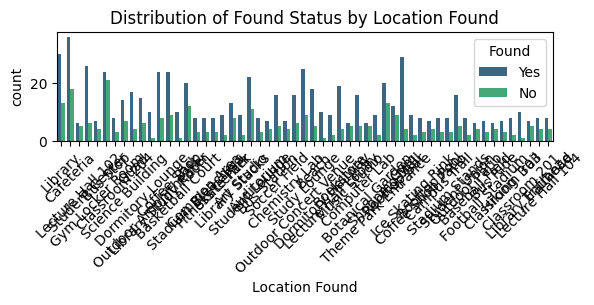

In [ ]:

plt.subplot(3, 1, 2)
sns.countplot(x='Location Found', hue='Found', data=data, palette='viridis')
plt.title('Distribution of Found Status by Location Found')
plt.xticks(rotation=45)


# Model Training and Prediction

In [ ]:
# Prepare the data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

categorical_features = data.columns[data.columns != 'Found'].tolist()

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
# Creating a pipeline to encode then run the RandomForest model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Splitting the data
X = data.drop('Found', axis=1)
y = data['Found']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model with the pipeline
pipeline.fit(X_train, y_train)

# Predicting on test data
y_pred = pipeline.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Model Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00        52
         Yes       0.74      1.00      0.85       148

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




# Plot 3: Condition When Found vs Found status

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y = data['Found']
X = data.drop('Found', axis=1)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


([0, 1, 2],
 [Text(0, 0, 'Good'), Text(1, 0, 'Damaged'), Text(2, 0, 'Excellent')])

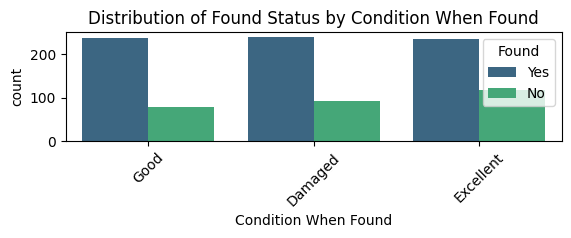

In [ ]:

plt.subplot(3, 1, 3)
sns.countplot(x='Condition When Found', hue='Found', data=data, palette='viridis')
plt.title('Distribution of Found Status by Condition When Found')
plt.xticks(rotation=45)

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data.drop('Found', axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data.drop('Found', axis=1))

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(data.columns.drop('Found')))

# Split the data into features and target variable
X = encoded_df
y = data['Found']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


y = data['Found']
X = data.drop('Found', axis=1)

# Encoding categorical variables (if any)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, index=X.index)  # Convert back to DataFrame and keep index

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

train_original = data.loc[X_train.index]
test_original = data.loc[X_test.index]

train_original['Found'] = y_train


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Reconstruct train and test dataframes with original data format
train_original = data.iloc[X_train.index]
test_original = data.iloc[X_test.index]

train_original['Found'] = y_train
test_original['Found'] = y_test

train_original.to_csv('train_data_original.csv', index=False)
test_original.to_csv('test_data_original.csv', index=False)

train_original_path = 'train_data_original.csv'
test_original_path = 'test_data_original.csv'

train_original_path, test_original_path


<ipython-input-29-858e0f6657da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_original['Found'] = y_train
<ipython-input-29-858e0f6657da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_original['Found'] = y_test


('train_data_original.csv', 'test_data_original.csv')

In [ ]:
import pandas as pd

# Create a DataFrame with test data (assuming X_test is a DataFrame)
test_results = X_test.copy()

# Adding true labels and predicted labels to the DataFrame
test_results['True_Label'] = y_test
test_results['Predicted_Label'] = y_pred

# Saving the DataFrame to a CSV file
test_results.to_csv('predicted_results.csv', index=False)


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store accuracy results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

print("Model accuracy results:\n", results)

Model accuracy results:
 {'Logistic Regression': 0.68, 'Decision Tree': 0.605, 'Random Forest': 0.74, 'SVM': 0.74, 'KNN': 0.66}
